In [1]:
##Notebook to plot the price of btc with the volume of tweets and reddit comments and the ratio of positive/negative.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# import the data
df_path = r"C:\Users\marc-\OneDrive\Bureau\ML4FIN\sentiment-analysis\dataset_twitter\normalized_24h_aggregated_data.csv"
df = pd.read_csv(df_path)

#df.head(10)
df.head(10)

,_24h_interval,sentiment_score,normalized_influence_robust,normalized_influence_minmax,normalized_influence_standard
0,1/1/2020,0.548312,3.988636,0.003044,0.139175
1,1/2/2020,0.497812,1.284091,0.001112,-0.082537
2,1/3/2020,0.125570,2.972727,0.002318,0.055893
3,1/4/2020,0.650860,0.463636,0.000526,-0.149796
4,1/5/2020,0.357350,-0.045455,0.000162,-0.191530
5,1/6/2020,-0.007217,2.780303,0.002181,0.040119
6,1/7/2020,-0.144100,0.436364,0.000506,-0.152032
7,1/8/2020,0.411550,0.659091,0.000666,-0.133773
8,1/9/2020,0.975100,-0.227273,0.000032,-0.206435
9,1/10/2020,0.794960,0.372727,0.000461,-0.157249


In [4]:
df_btc=pd.read_csv(r"C:\Users\marc-\OneDrive\Bureau\ML4FIN\sentiment-analysis\dataset_twitter\BTC-USD.csv")
df_btc.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316,7200.174316,18565664997
1,2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,6985.470215,20802083465
2,2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,7344.884277,28111481032
3,2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,7410.656738,18444271275
4,2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,7411.317383,19725074095
5,2020-01-06,7410.452148,7781.867188,7409.292969,7769.219238,7769.219238,23276261598
6,2020-01-07,7768.682129,8178.215820,7768.227539,8163.692383,8163.692383,28767291327
7,2020-01-08,8161.935547,8396.738281,7956.774414,8079.862793,8079.862793,31672559265
8,2020-01-09,8082.295898,8082.295898,7842.403809,7879.071289,7879.071289,24045990466
9,2020-01-10,7878.307617,8166.554199,7726.774902,8166.554199,8166.554199,28714583844


In [5]:
df['BTC price']=(df_btc['High']+df_btc['Low'])/2
df.head(10)

,_24h_interval,sentiment_score,normalized_influence_robust,normalized_influence_minmax,normalized_influence_standard,BTC price
0,1/1/2020,0.548312,3.988636,0.003044,0.139175,7214.637451
1,1/2/2020,0.497812,1.284091,0.001112,-0.082537,7073.712647
2,1/3/2020,0.125570,2.972727,0.002318,0.055893,7164.355713
3,1/4/2020,0.650860,0.463636,0.000526,-0.149796,7368.449951
4,1/5/2020,0.357350,-0.045455,0.000162,-0.191530,7472.516358
5,1/6/2020,-0.007217,2.780303,0.002181,0.040119,7595.580079
6,1/7/2020,-0.144100,0.436364,0.000506,-0.152032,7973.221680
7,1/8/2020,0.411550,0.659091,0.000666,-0.133773,8176.756348
8,1/9/2020,0.975100,-0.227273,0.000032,-0.206435,7962.349853
9,1/10/2020,0.794960,0.372727,0.000461,-0.157249,7946.664550


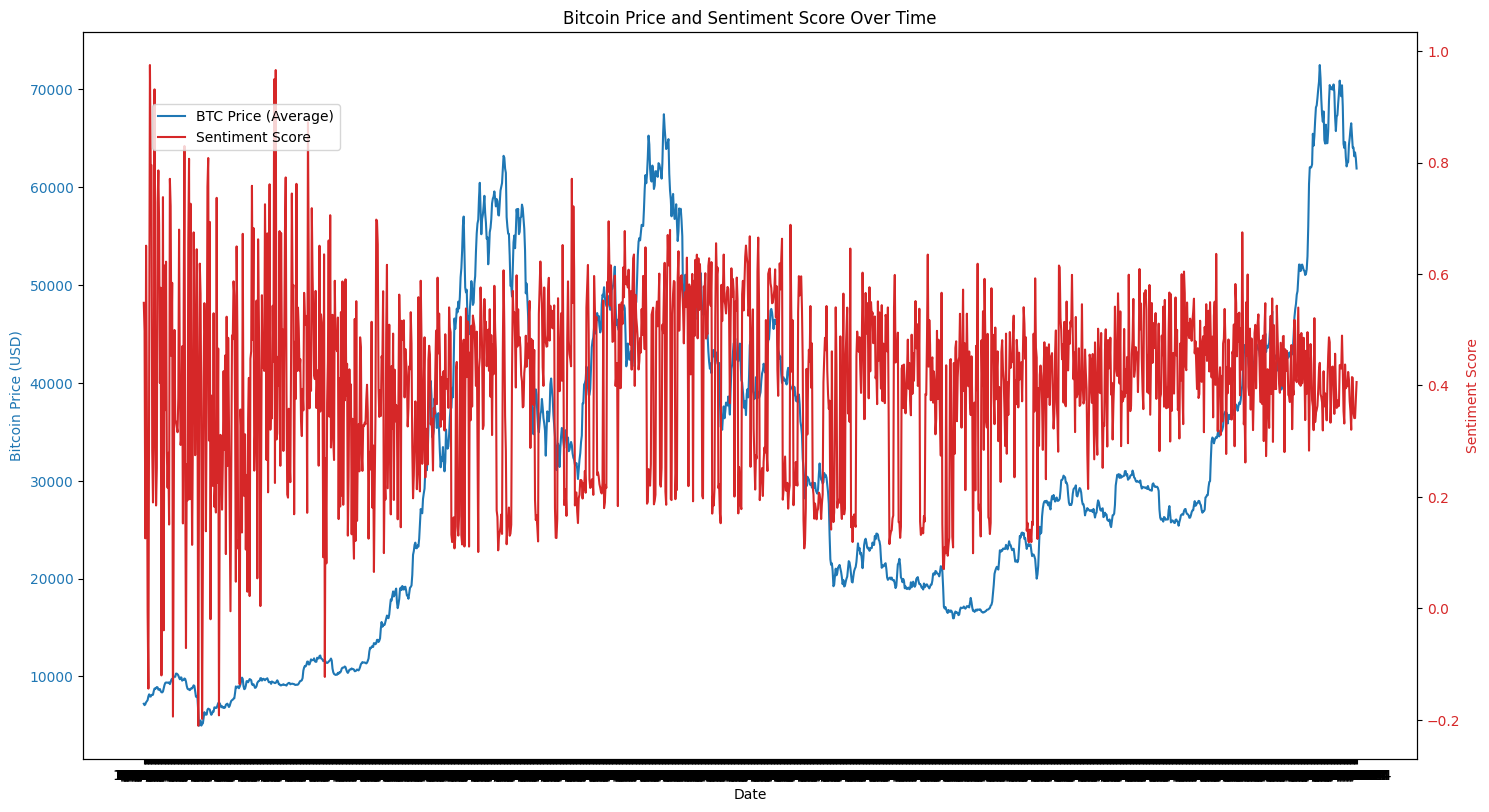

In [6]:
# Group by date to get daily tweet volume and average sentiment (if not already aggregated)
# Plotting the data
fig, ax1 = plt.subplots(figsize=(15, 8))

# Plot Bitcoin price (Average price)
ax1.set_xlabel('Date')
ax1.set_ylabel('Bitcoin Price (USD)', color='tab:blue')
ax1.plot(df['_24h_interval'], df['BTC price'], color='tab:blue', label='BTC Price (Average)')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis to plot sentiment
ax2 = ax1.twinx()
ax2.set_ylabel('Sentiment Score', color='tab:red')
ax2.plot(df['_24h_interval'], df['sentiment_score'], color='tab:red', label='Sentiment Score')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Add legend
fig.tight_layout()  # Ensure the layout is tidy
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

plt.title('Bitcoin Price and Sentiment Score Over Time')
plt.show()

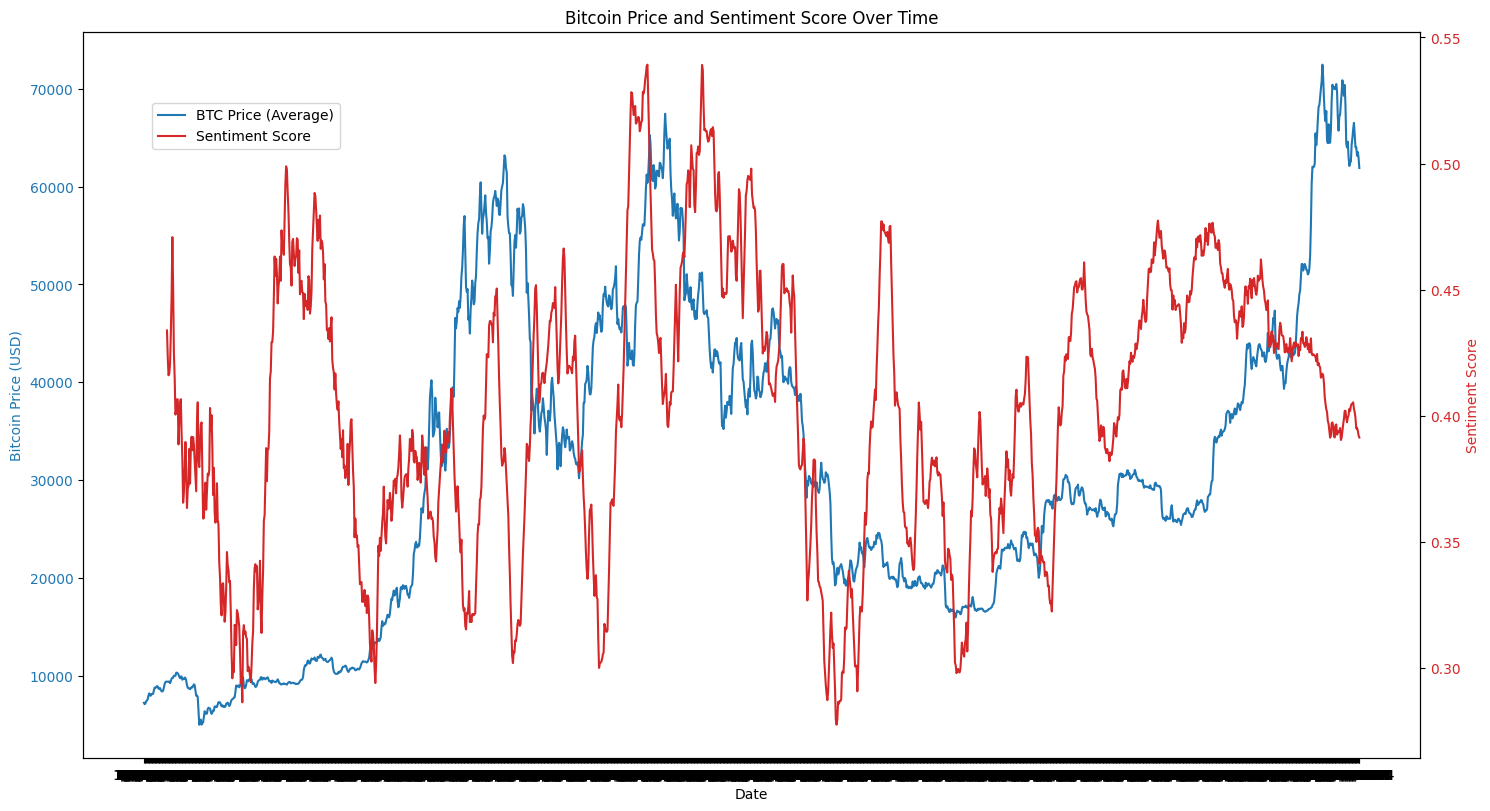

In [7]:
# Smooth the sentiment score using a rolling average
df['smoothed_sentiment'] = df['sentiment_score'].rolling(window=31).mean()

fig, ax1 = plt.subplots(figsize=(15, 8))

# Plot Bitcoin price (Average price)
ax1.set_xlabel('Date')
ax1.set_ylabel('Bitcoin Price (USD)', color='tab:blue')
ax1.plot(df['_24h_interval'], df['BTC price'], color='tab:blue', label='BTC Price (Average)')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis to plot sentiment
ax2 = ax1.twinx()
ax2.set_ylabel('Sentiment Score', color='tab:red')
ax2.plot(df['_24h_interval'], df['smoothed_sentiment'], color='tab:red', label='Sentiment Score')
ax2.tick_params(axis='y', labelcolor='tab:red')
#ax2.set_ylim(-1, 1)

# Add legend
fig.tight_layout()  # Ensure the layout is tidy
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

plt.title('Bitcoin Price and Sentiment Score Over Time')
plt.show()

In [8]:
##Adding volumes of tweets

In [9]:
import pandas as pd

# Define the file paths
file_paths = [
    r'C:\Users\marc-\OneDrive\Bureau\ML4FIN\sentiment-analysis\dataset_twitter\distil_p1.parquet',
    r'C:\Users\marc-\OneDrive\Bureau\ML4FIN\sentiment-analysis\dataset_twitter\distil_p2.parquet',
    r'C:\Users\marc-\OneDrive\Bureau\ML4FIN\sentiment-analysis\dataset_twitter\distil_p3.parquet',
    r'C:\Users\marc-\OneDrive\Bureau\ML4FIN\sentiment-analysis\dataset_twitter\distil_p4.parquet'
]

# Read and concatenate the Parquet files
dfs = [pd.read_parquet(file_path) for file_path in file_paths]
combined_df = pd.concat(dfs, ignore_index=True)

# Ensure the 'date' column is in datetime format
combined_df['date'] = pd.to_datetime(combined_df['date'])

# Compute the volume of rows daily
daily_volume = combined_df.groupby(combined_df['date'].dt.date).size().reset_index(name='volume')

# Save the daily volume DataFrame to a new CSV file
daily_volume.head(10)

,date,volume
0,2020-01-01,7
1,2020-01-02,7
2,2020-01-03,10
3,2020-01-04,5
4,2020-01-05,2
5,2020-01-06,5
6,2020-01-07,5
7,2020-01-08,5
8,2020-01-09,2
9,2020-01-10,5


In [10]:
daily_volume.tail(10)

,date,volume
1572,2024-04-21,139
1573,2024-04-22,158
1574,2024-04-23,163
1575,2024-04-24,182
1576,2024-04-25,196
1577,2024-04-26,197
1578,2024-04-27,152
1579,2024-04-28,158
1580,2024-04-29,210
1581,2024-04-30,138


In [11]:
df['Volume_posted']=daily_volume['volume']

In [12]:
df.head(10)

,_24h_interval,sentiment_score,normalized_influence_robust,normalized_influence_minmax,normalized_influence_standard,BTC price,smoothed_sentiment,Volume_posted
0,1/1/2020,0.548312,3.988636,0.003044,0.139175,7214.637451,NaN,7
1,1/2/2020,0.497812,1.284091,0.001112,-0.082537,7073.712647,NaN,7
2,1/3/2020,0.125570,2.972727,0.002318,0.055893,7164.355713,NaN,10
3,1/4/2020,0.650860,0.463636,0.000526,-0.149796,7368.449951,NaN,5
4,1/5/2020,0.357350,-0.045455,0.000162,-0.191530,7472.516358,NaN,2
5,1/6/2020,-0.007217,2.780303,0.002181,0.040119,7595.580079,NaN,5
6,1/7/2020,-0.144100,0.436364,0.000506,-0.152032,7973.221680,NaN,5
7,1/8/2020,0.411550,0.659091,0.000666,-0.133773,8176.756348,NaN,5
8,1/9/2020,0.975100,-0.227273,0.000032,-0.206435,7962.349853,NaN,2
9,1/10/2020,0.794960,0.372727,0.000461,-0.157249,7946.664550,NaN,5


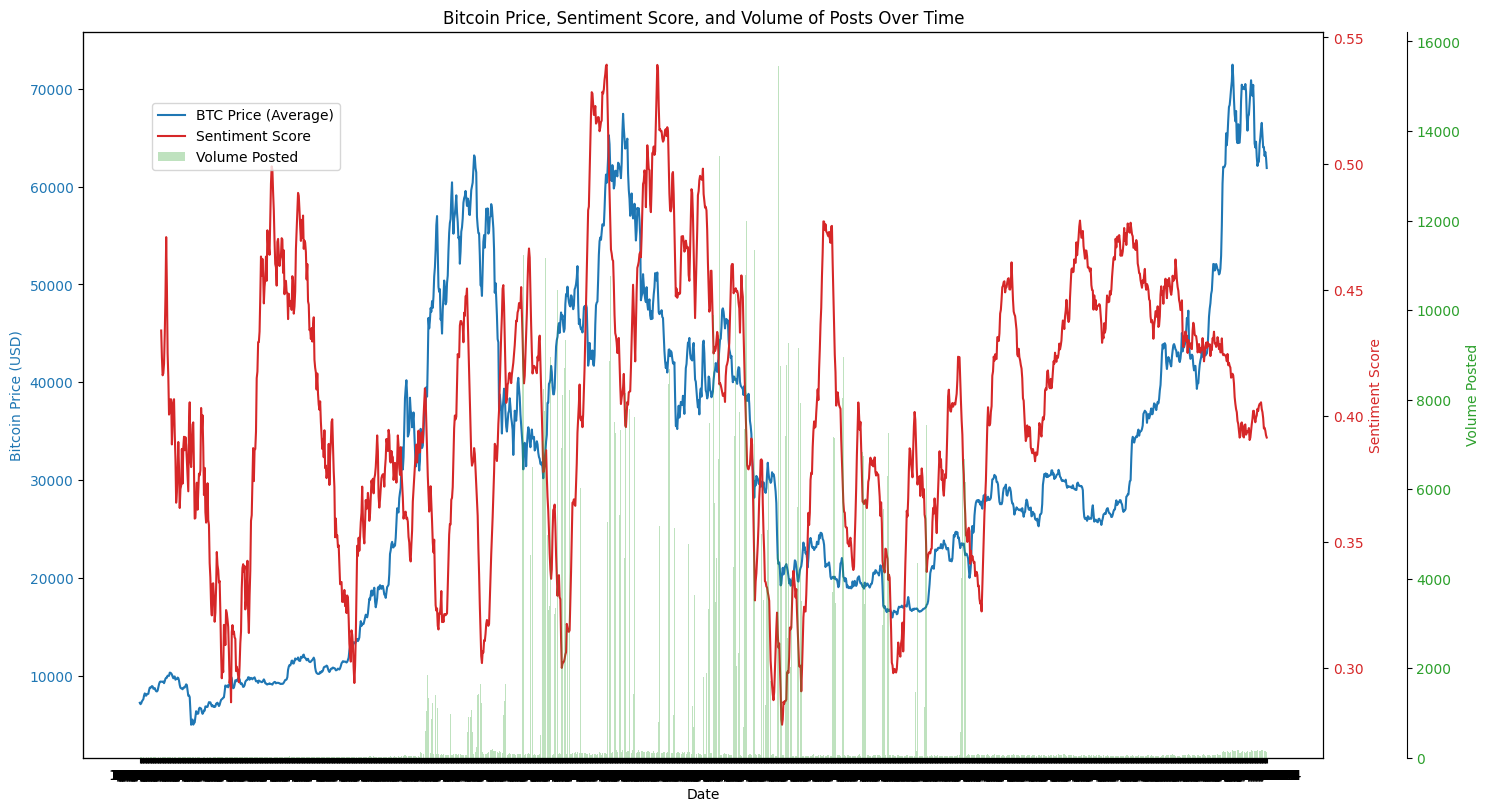

In [13]:
fig, ax1 = plt.subplots(figsize=(15, 8))

# Plot Bitcoin price (Average price)
ax1.set_xlabel('Date')
ax1.set_ylabel('Bitcoin Price (USD)', color='tab:blue')
ax1.plot(df['_24h_interval'], df['BTC price'], color='tab:blue', label='BTC Price (Average)')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis to plot sentiment
ax2 = ax1.twinx()
ax2.set_ylabel('Sentiment Score', color='tab:red')
ax2.plot(df['_24h_interval'], df['smoothed_sentiment'], color='tab:red', label='Sentiment Score')
ax2.tick_params(axis='y', labelcolor='tab:red')
#ax2.set_ylim(-1, 1)

# Create a third y-axis for volume
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # Move the third y-axis outward
ax3.set_ylabel('Volume Posted', color='tab:green')
ax3.bar(df['_24h_interval'], df['Volume_posted'], color='tab:green', alpha=0.3, label='Volume Posted')
ax3.tick_params(axis='y', labelcolor='tab:green')

# Add legend
fig.tight_layout()  # Ensure the layout is tidy
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

plt.title('Bitcoin Price, Sentiment Score, and Volume of Posts Over Time')
plt.show()